In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
import scipy.stats as stats


from ast import literal_eval
from sklearn.metrics import cohen_kappa_score

In [2]:
df = pd.read_csv('data/instances_2014all_workerinfo.csv')

## Do Aggregated Labels Represent Individuals Uniformly?

In [23]:
def to_int(label):
    if label == 'Male': return 0
    elif label == 'Female': return 1
    elif label == 'Unsure': return 2
    else:
        raise ValueError
        
def worker_annotations(att):
    wtoa = {}
    for row in df.iterrows():
        worker_ids = literal_eval(row[1]['worker_id'])
        anns = literal_eval(row[1]['{}_agg'.format(att)])
        maj = row[1][att]
        if maj != maj:
            continue
        else:
            for index, worker in enumerate(worker_ids):
                if worker not in wtoa: wtoa[worker] = {'i': [], 'maj': []}
                wtoa[worker]['i'].append(to_int(anns[index]))
                wtoa[worker]['maj'].append(to_int(maj))
    return wtoa

def get_irr(wtoa):
    # evaluate cohen's kappa
    ck = []
    for worker in wtoa:
        individual = wtoa[worker]['i']
        majority = wtoa[worker]['maj']
        score = cohen_kappa_score(individual, majority)
        if score != score:
            ck.append(1.0)
        else:
            ck.append(score)
    return ck

In [5]:
gender_kappa = get_irr(worker_annotations('gender'))
print(np.mean(gender_kappa), np.std(gender_kappa))

/scratch/network/dorothyz/miniconda3/envs/sony/lib/python3.7/site-packages/sklearn/metrics/_classification.py:641: RuntimeWarning: invalid value encountered in true_divide
  k = np.sum(w_mat * confusion) / np.sum(w_mat * expected)


0.8266994613032089 0.13883564936728748


/scratch/network/dorothyz/miniconda3/envs/sony/lib/python3.7/site-packages/sklearn/metrics/_classification.py:641: RuntimeWarning: invalid value encountered in true_divide
  k = np.sum(w_mat * confusion) / np.sum(w_mat * expected)
/scratch/network/dorothyz/miniconda3/envs/sony/lib/python3.7/site-packages/sklearn/metrics/_classification.py:641: RuntimeWarning: invalid value encountered in true_divide
  k = np.sum(w_mat * confusion) / np.sum(w_mat * expected)
/scratch/network/dorothyz/miniconda3/envs/sony/lib/python3.7/site-packages/sklearn/metrics/_classification.py:641: RuntimeWarning: invalid value encountered in true_divide
  k = np.sum(w_mat * confusion) / np.sum(w_mat * expected)
/scratch/network/dorothyz/miniconda3/envs/sony/lib/python3.7/site-packages/sklearn/metrics/_classification.py:641: RuntimeWarning: invalid value encountered in true_divide
  k = np.sum(w_mat * confusion) / np.sum(w_mat * expected)


In [ ]:
plt.style.use('ggplot')
plt.figure(dpi=500)
plt.hist(gender_kappa), bins = [0.0, 0.2, 0.4, 0.6, 0.8, 1.0], edgecolor='white', linewidth=1.2)
plt.ylabel('Number of Annotators')
plt.xlabel('Kappa with Majority')
plt.title('Gender')

In [ ]:
wtoa = {}
for row in df.iterrows():
    worker_ids = literal_eval(row[1]['worker_id'])
    skin_anns = literal_eval(row[1]['skin_agg'])
    maj = row[1]['skin']
    if maj != maj:
        continue
    else:
        for index, worker in enumerate(worker_ids):
            if worker not in wtoa: wtoa[worker] = {'i': [], 'maj': []}
            if skin_anns[index] == 'Unsure': skin_anns[index] = 7
            if maj == 'Unsure': maj = 7
            wtoa[worker]['i'].append(int(skin_anns[index]))
            wtoa[worker]['maj'].append(int(maj))

# evaluate cohen's kappa
ck = []
for worker in wtoa:
    individual = wtoa[worker]['i']
    majority = wtoa[worker]['maj']
    score = cohen_kappa_score(individual, majority)
    if score != score:
        ck.append(1.0)
    else:
        ck.append(score)

plt.style.use('ggplot')
plt.figure(dpi=500)
plt.hist(ck, bins = [0.0, 0.2, 0.4, 0.6, 0.8, 1.0], edgecolor='white', linewidth=1.2)
plt.ylabel('Number of Annotators')
plt.xlabel('Kappa with Majority')
plt.title('Skin Color')

## Do Aggregated Labels Represent Demographic Groups?

In [6]:
worker_demographics = pickle.load(open('data/worker_demographics.pkl', 'rb'))

### Gender Annotations

In [24]:
def worker_gender(att, gender):
    wtoa = {}
    for row in df.iterrows():
        worker_ids = literal_eval(row[1]['worker_id'])
        anns = literal_eval(row[1]['{}_agg'.format(att)])
        maj = row[1][att]
        if maj != maj:
            continue
        else:
            for index, worker in enumerate(worker_ids):
                if worker in worker_demographics and worker_demographics[worker]['gender'] == gender: 
                    if worker not in wtoa: wtoa[worker] = {'i': [], 'maj': []}
                    wtoa[worker]['i'].append(to_int(anns[index]))
                    wtoa[worker]['maj'].append(to_int(maj))
    return wtoa

def worker_race(att, race):
    wtoa = {}
    for row in df.iterrows():
        worker_ids = literal_eval(row[1]['worker_id'])
        anns = literal_eval(row[1]['{}_agg'.format(att)])
        maj = row[1][att]
        if maj != maj:
            continue
        else:
            for index, worker in enumerate(worker_ids):
                if worker in worker_demographics and worker_demographics[worker]['race'] == [race]: 
                    if worker not in wtoa: wtoa[worker] = {'i': [], 'maj': []}
                    wtoa[worker]['i'].append(to_int(anns[index]))
                    wtoa[worker]['maj'].append(to_int(maj))
    return wtoa

def worker_gr(att, gender, race):
    wtoa = {}
    for row in df.iterrows():
        worker_ids = literal_eval(row[1]['worker_id'])
        anns = literal_eval(row[1]['{}_agg'.format(att)])
        maj = row[1][att]
        if maj != maj:
            continue
        else:
            for index, worker in enumerate(worker_ids):
                if worker in worker_demographics and worker_demographics[worker]['race'] == [race] and worker_demographics[worker]['gender'] == gender: 
                    if worker not in wtoa: wtoa[worker] = {'i': [], 'maj': []}
                    wtoa[worker]['i'].append(to_int(anns[index]))
                    wtoa[worker]['maj'].append(to_int(maj))
    return wtoa

In [9]:
male_gender = get_irr(worker_gender('gender', 'male'))
female_gender = get_irr(worker_gender('gender', 'female'))
fvalue, pvalue = stats.f_oneway(male_gender, female_gender)
print(np.mean(male_gender), np.std(male_gender), np.mean(female_gender), np.std(female_gender), fvalue, pvalue)

0.8150005826604781 0.08363995136093112 0.8155399936824786 0.0817301728222722 0.004592914109852257 0.9459991786327422


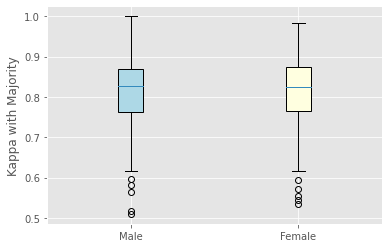

In [11]:
plt.style.use('ggplot')
# plt.figure(dpi=500)
# fig, ax = plt.figure()
bplot = plt.boxplot((male_gender, female_gender), patch_artist=True, labels=['Male', 'Female'], vert=True)
# plt.xticks(ticks=[1, 2], labels= ['Male', 'Female'])
plt.ylabel('Kappa with Majority')

colors = ['lightblue', 'lightyellow']
for patch, color in zip(bplot['boxes'], colors):
    patch.set_facecolor(color)


In [14]:
white_gender = get_irr(worker_race('gender', 'white'))
black_gender = get_irr(worker_race('gender', 'black'))
asian_gender = get_irr(worker_race('gender', 'asian'))
lat_gender = get_irr(worker_race('gender', 'latinx'))


print(np.mean(white_gender), np.std(white_gender))
print(np.mean(black_gender), np.std(black_gender))
print(np.mean(asian_gender), np.std(asian_gender))
print(np.mean(lat_gender), np.std(lat_gender))
fvalue, pvalue = stats.f_oneway(white_gender, black_gender, asian_gender, lat_gender)
print(fvalue, pvalue)

0.8150354696560811 0.08353672703934095
0.8070261204976776 0.11225328621988223
0.8178932716600452 0.06350177415663268
0.8130069696621246 0.08527709243463054
0.09226480885842787 0.9642883637897008


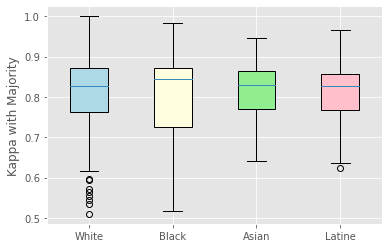

In [13]:
plt.style.use('ggplot')
# plt.figure(dpi=500)
# fig, ax = plt.figure()
bplot = plt.boxplot((white_gender, black_gender, asian_gender, lat_gender), patch_artist=True, labels=['White', 'Black', 'Asian', 'Latine'], vert=True)
# plt.xticks(ticks=[1, 2], labels= ['Male', 'Female'])
plt.ylabel('Kappa with Majority')

colors = ['lightblue', 'lightyellow', 'lightgreen', 'pink']
for patch, color in zip(bplot['boxes'], colors):
    patch.set_facecolor(color)

In [32]:
irrs = []
for race in ['white', 'black', 'asian', 'latinx']:
    for gender in ['male', 'female']:
        gr = worker_gr('gender', gender, race)
        irr = get_irr(gr)
        print('{} {} {:.3f}'.format(race, gender, np.mean(irr)))
        irrs.append(irr)
        


white male 0.815
white female 0.815
black male 0.773
black female 0.833
asian male 0.819
asian female 0.819
latinx male 0.817
latinx female 0.808


In [63]:
fvalue, pvalue = stats.f_oneway(*irrs)
print(fvalue, pvalue)

0.45686561103548967 0.8654114992917213


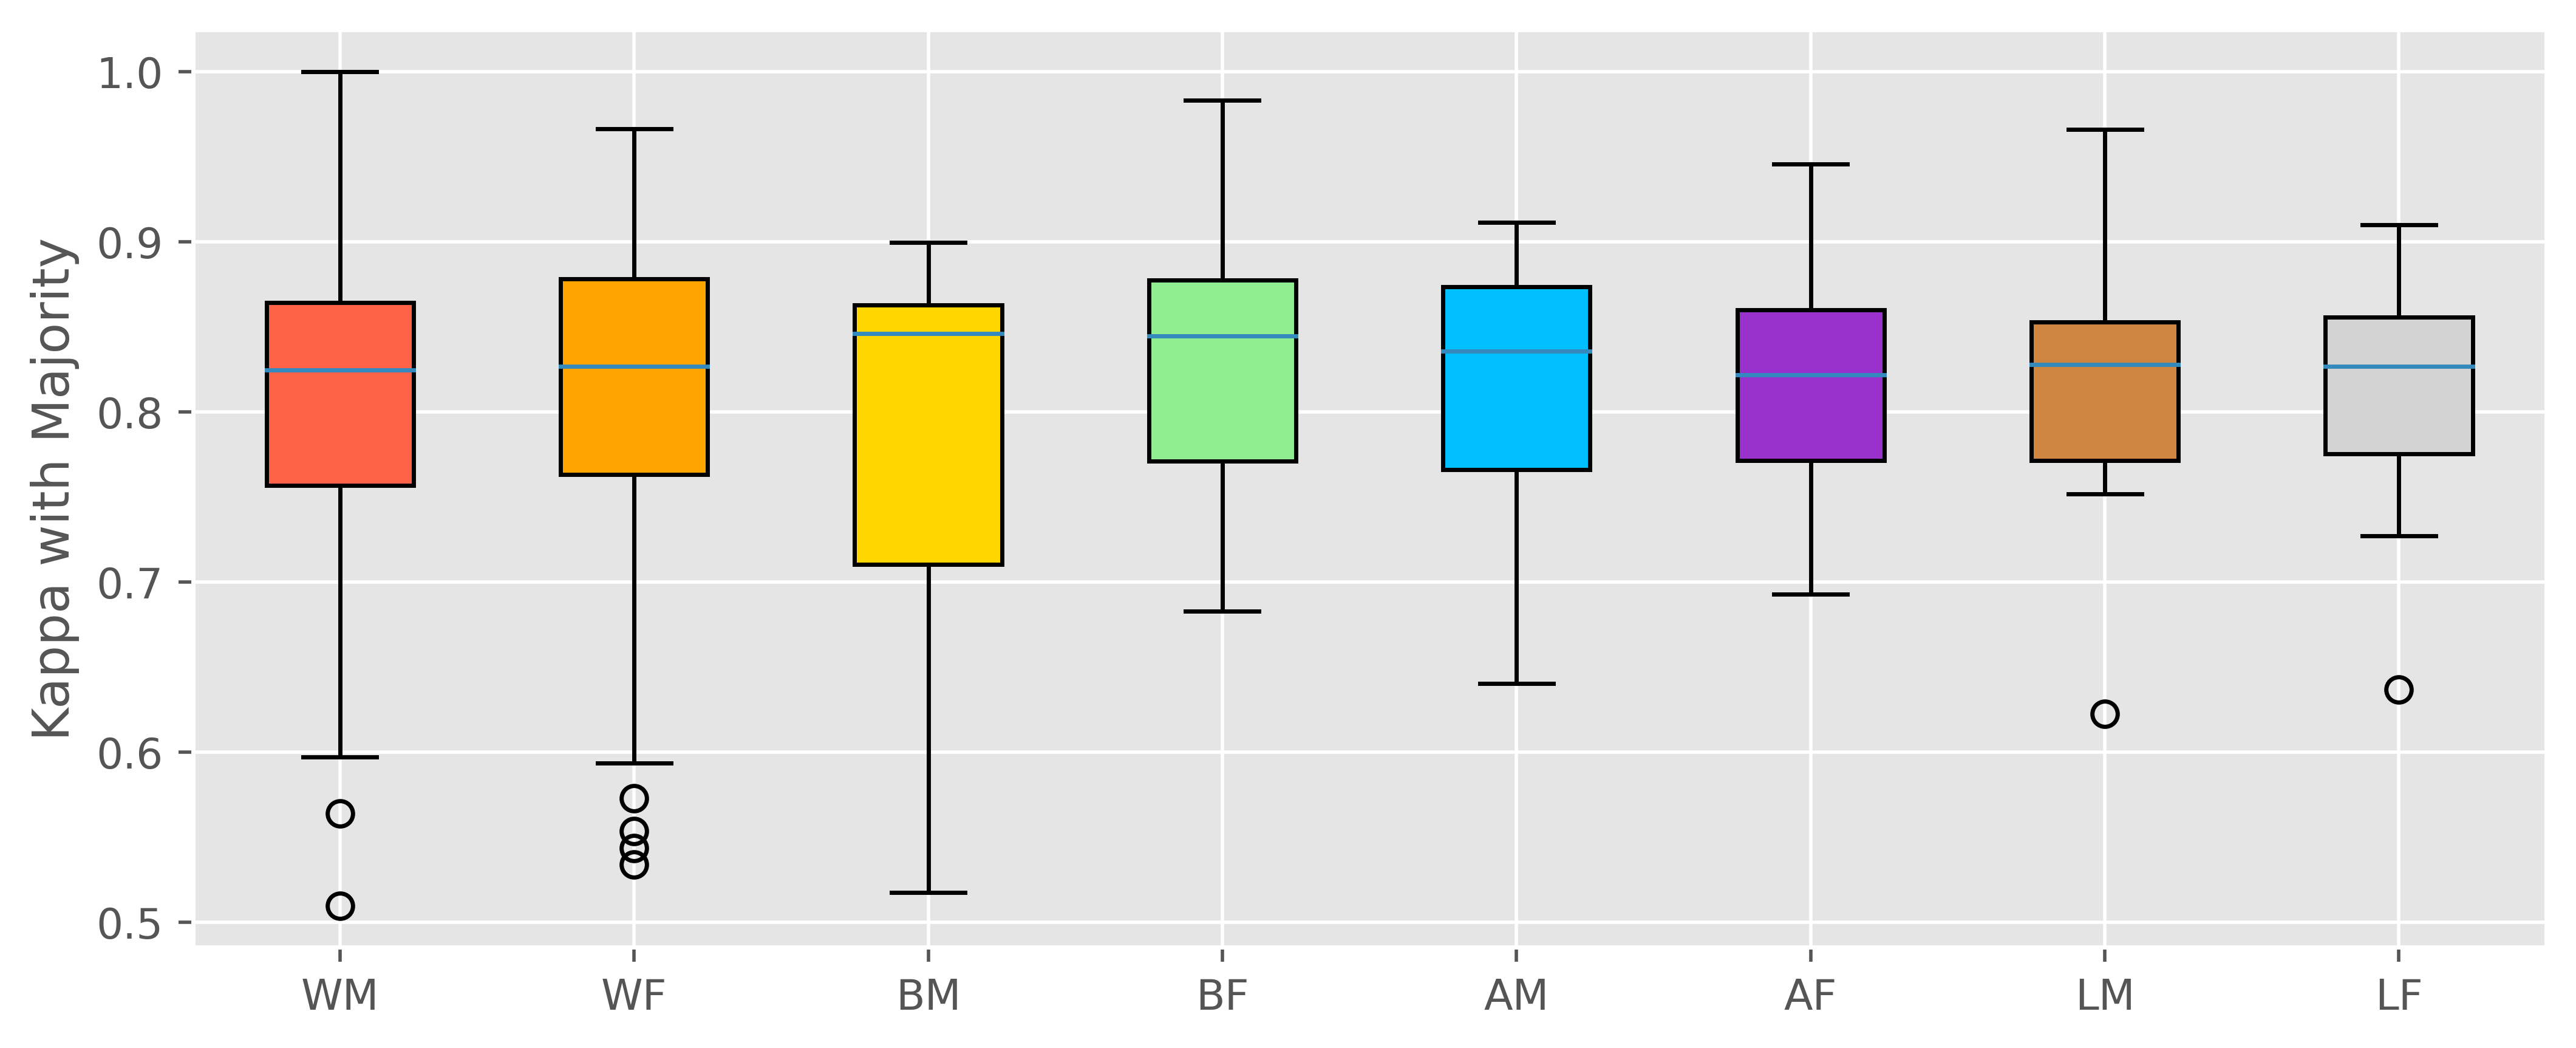

In [66]:
plt.style.use('ggplot')
plt.figure(dpi=500, figsize=(10, 4))
# fig, ax = plt.figure()
bplot = plt.boxplot(irrs, patch_artist=True, labels=['WM', 'WF', 'BM', 'BF', 'AM', 'AF', 'LM', 'LF'], vert=True)
# plt.xticks(ticks=[1, 2], labels= ['Male', 'Female'])
plt.ylabel('Kappa with Majority')

colors = ['tomato', 'orange', 'gold', 'lightgreen', 'deepskyblue', 'darkorchid', 'peru', 'lightgray']
for patch, color in zip(bplot['boxes'], colors):
    patch.set_facecolor(color)

### Skin Color Annotations

In [44]:
def worker_gender(att, gender):
    wtoa = {}
    for row in df.iterrows():
        worker_ids = literal_eval(row[1]['worker_id'])
        anns = literal_eval(row[1]['{}_agg'.format(att)])
        maj = row[1][att]
        if maj != maj:
            continue
        else:
            for index, worker in enumerate(worker_ids):
                if worker in worker_demographics and worker_demographics[worker]['gender'] == gender: 
                    if worker not in wtoa: wtoa[worker] = {'i': [], 'maj': []}
                    if anns[index] == 'Unsure': anns[index] = 7
                    if maj == 'Unsure': maj = 7
                    wtoa[worker]['i'].append(int(anns[index]))
                    wtoa[worker]['maj'].append(int(maj))

    return wtoa

def worker_race(att, race):
    wtoa = {}
    for row in df.iterrows():
        worker_ids = literal_eval(row[1]['worker_id'])
        anns = literal_eval(row[1]['{}_agg'.format(att)])
        maj = row[1][att]
        if maj != maj:
            continue
        else:
            for index, worker in enumerate(worker_ids):
                if worker in worker_demographics and worker_demographics[worker]['race'] == [race]: 
                    if worker not in wtoa: wtoa[worker] = {'i': [], 'maj': []}
                    if anns[index] == 'Unsure': anns[index] = 7
                    if maj == 'Unsure': maj = 7
                    wtoa[worker]['i'].append(int(anns[index]))
                    wtoa[worker]['maj'].append(int(maj))
    return wtoa

In [40]:
male_race = get_irr(worker_gender('skin', 'male'))
female_race = get_irr(worker_gender('skin', 'female'))
fvalue, pvalue = stats.f_oneway(male_race, female_race)
print(fvalue, pvalue)

0.007779767210247183 0.9297561199081728


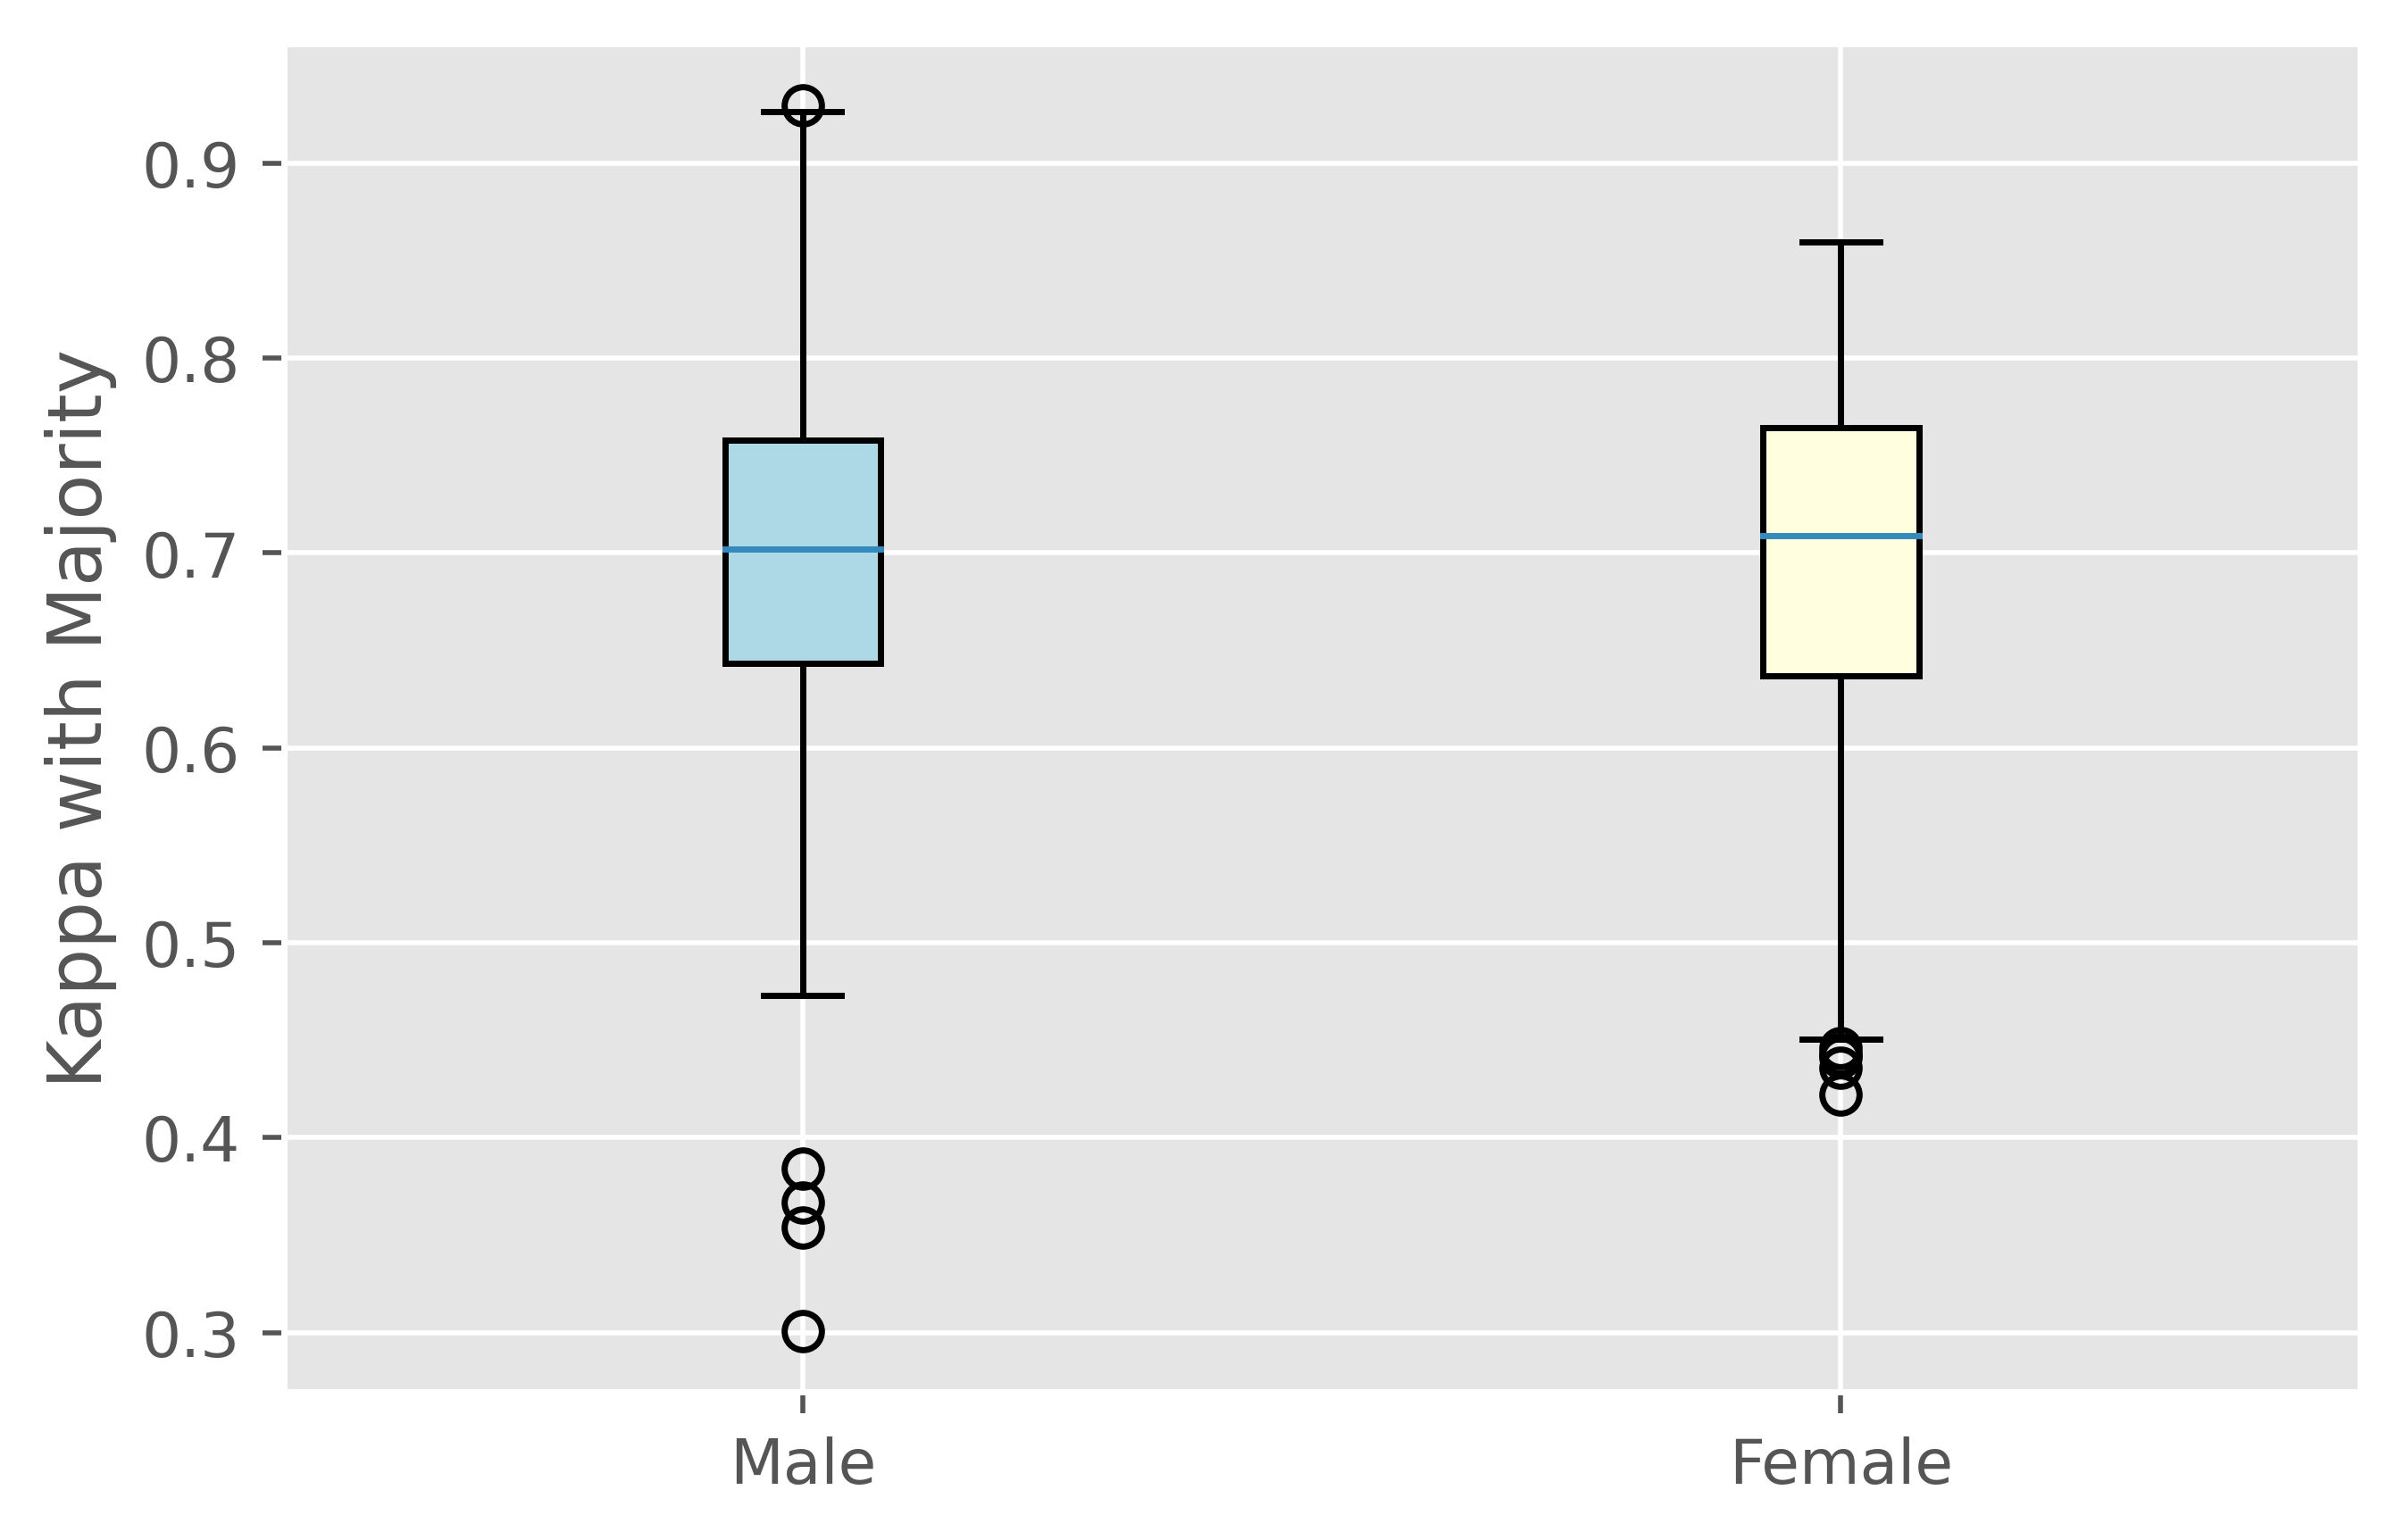

In [41]:
plt.style.use('ggplot')
plt.figure(dpi=500)
# fig, ax = plt.figure()
bplot = plt.boxplot((male_race, female_race), patch_artist=True, labels=['Male', 'Female'], vert=True)
# plt.xticks(ticks=[1, 2], labels= ['Male', 'Female'])
plt.ylabel('Kappa with Majority')

colors = ['lightblue', 'lightyellow']
for patch, color in zip(bplot['boxes'], colors):
    patch.set_facecolor(color)


In [45]:
white_gender = get_irr(worker_race('skin', 'white'))
black_gender = get_irr(worker_race('skin', 'black'))
asian_gender = get_irr(worker_race('skin', 'asian'))
lat_gender = get_irr(worker_race('skin', 'latinx'))


print(np.mean(white_gender))
print(np.mean(black_gender))
print(np.mean(asian_gender))
print(np.mean(lat_gender))
fvalue, pvalue = stats.f_oneway(white_gender, black_gender, asian_gender, lat_gender)
print(fvalue, pvalue)

0.6895020996151872
0.6869772457554724
0.7042300619318749
0.7141050395871763
0.6361897959139163 0.5920378783348841


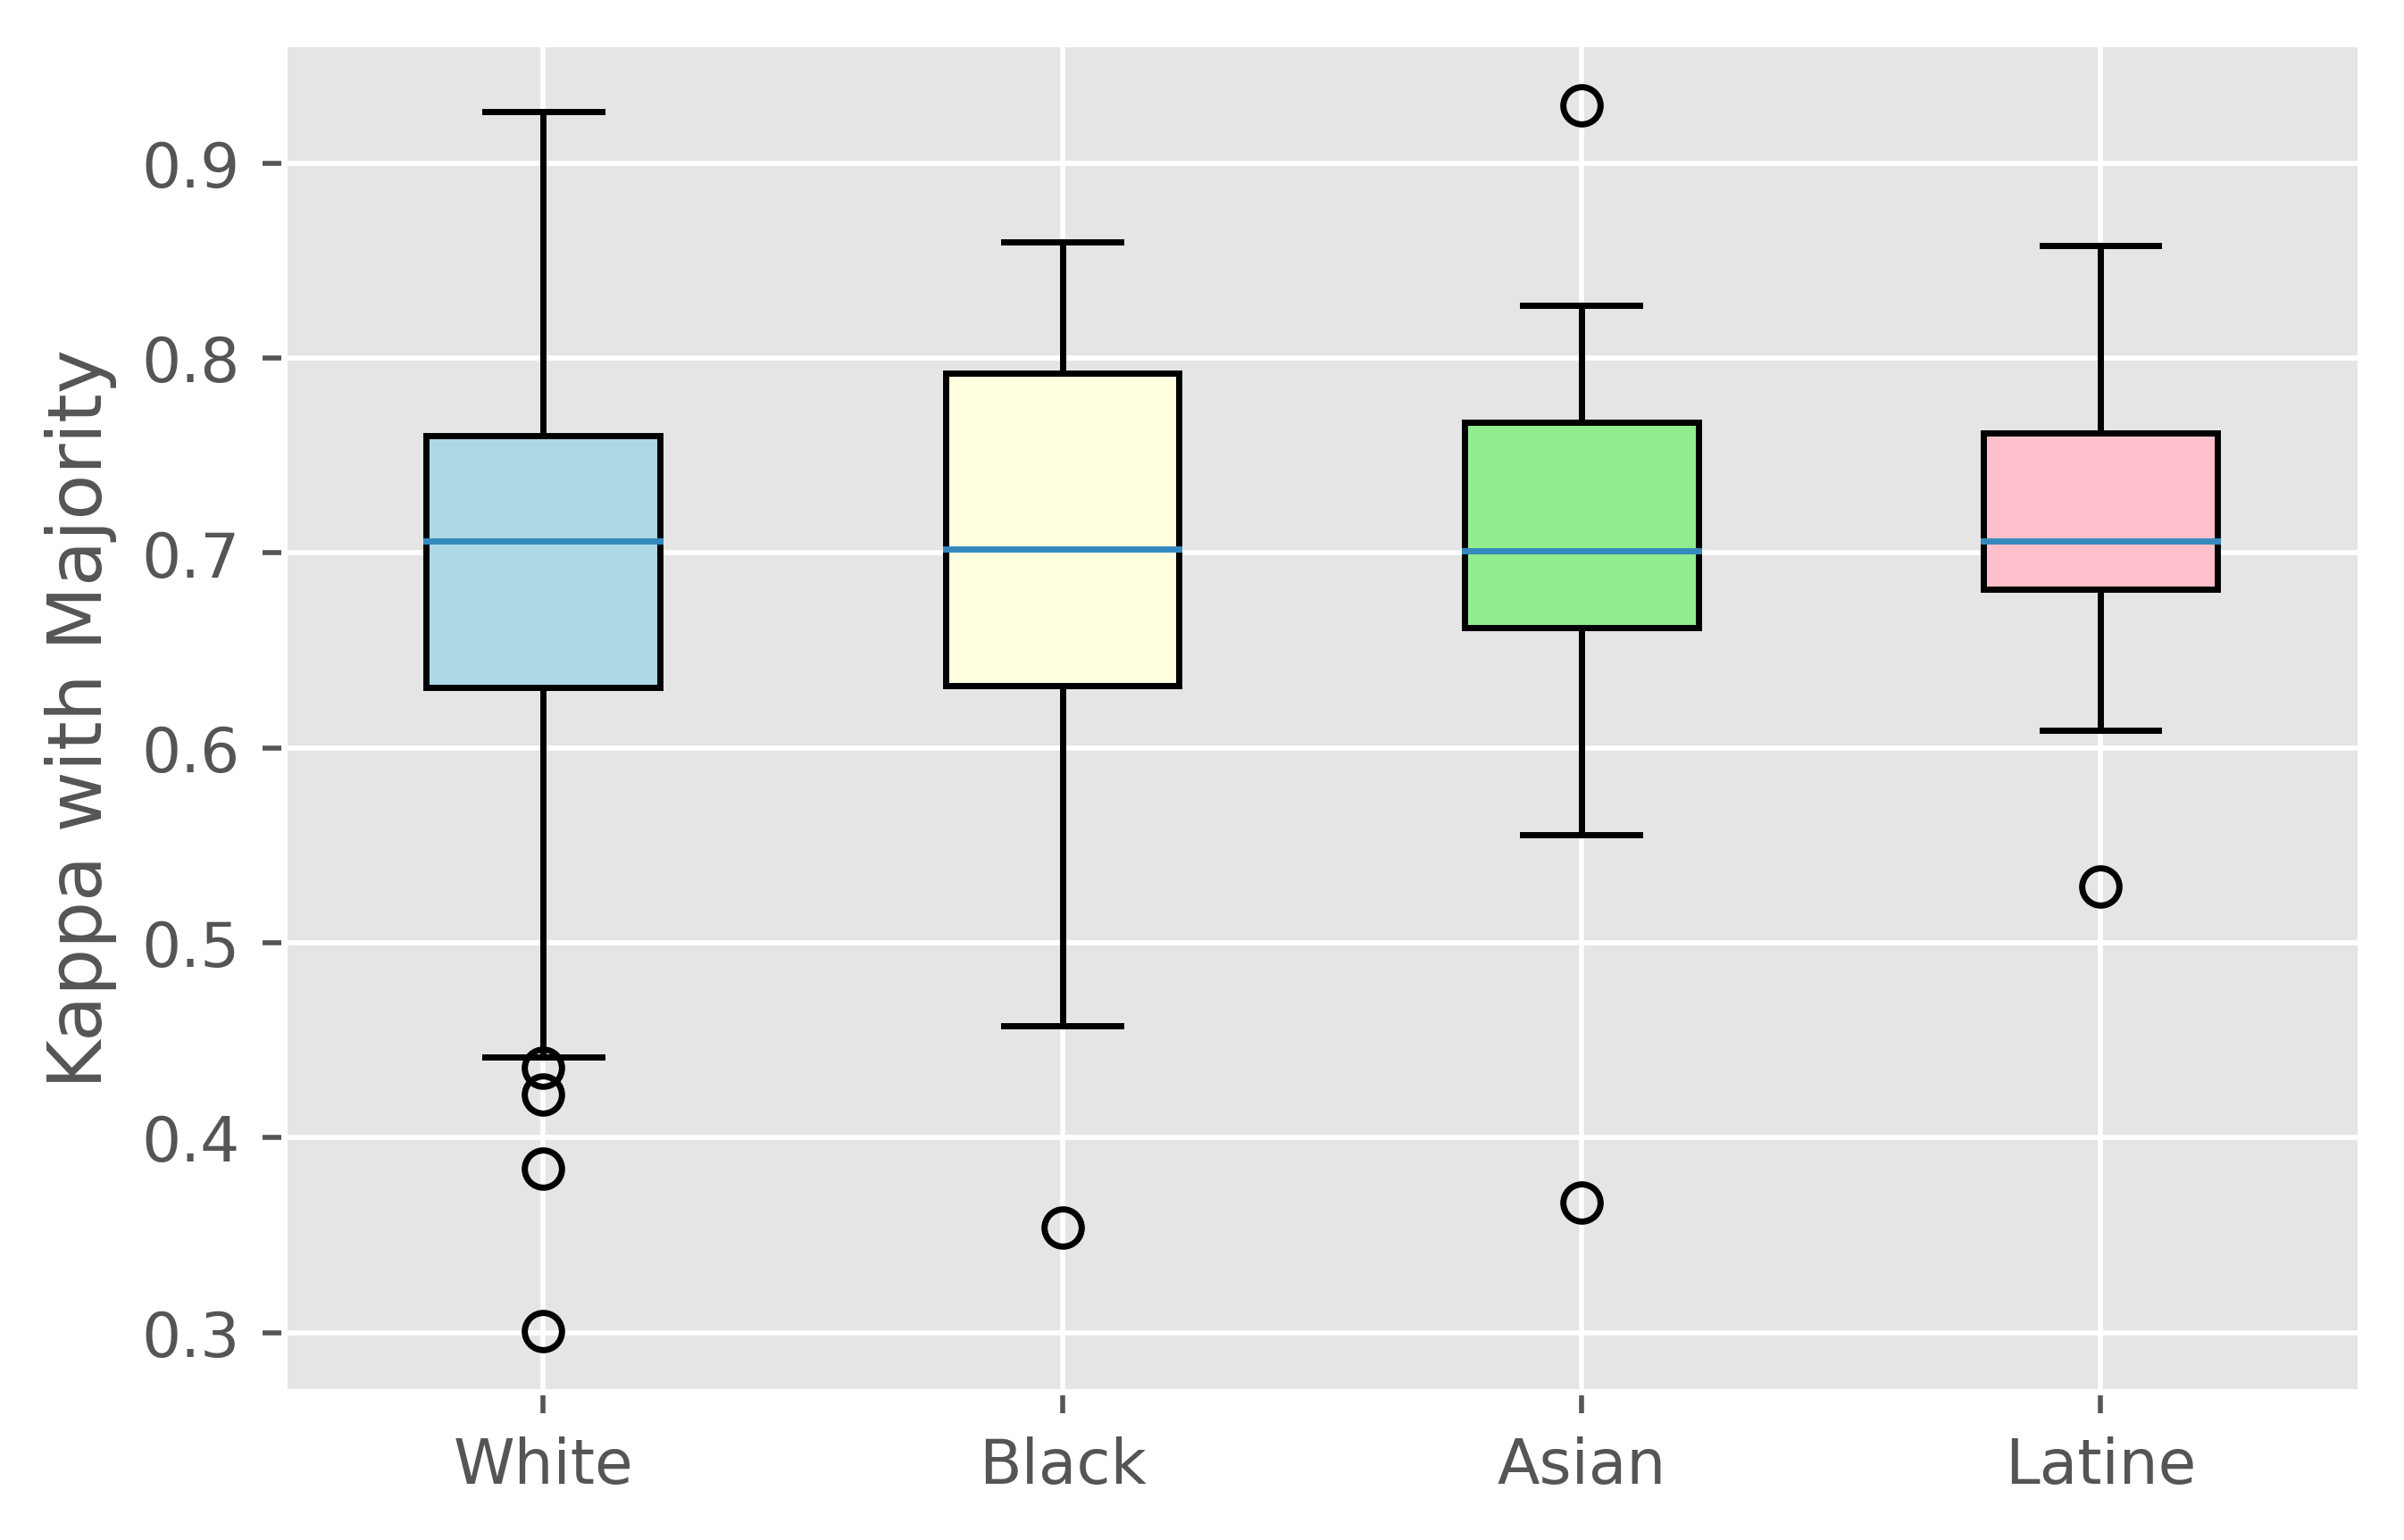

In [46]:
plt.style.use('ggplot')
plt.figure(dpi=500)
# fig, ax = plt.figure()
bplot = plt.boxplot((white_gender, black_gender, asian_gender, lat_gender), patch_artist=True, labels=['White', 'Black', 'Asian', 'Latine'], vert=True)
# plt.xticks(ticks=[1, 2], labels= ['Male', 'Female'])
plt.ylabel('Kappa with Majority')

colors = ['lightblue', 'lightyellow', 'lightgreen', 'pink']
for patch, color in zip(bplot['boxes'], colors):
    patch.set_facecolor(color)